In [1]:
import sys
import os
import time
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import itertools
import WormFunctions as wrm
import seaborn as sns

from importlib import reload 
sns.set_theme(style='white')

all loci are recessive
[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 ...
 [1. 1. 1. 1. 1. 0.]
 [1. 1. 1. 1. 1. 0.]
 [1. 1. 1. 1. 1. 1.]]
genotypes [[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 2.]
 ...
 [2. 2. 2. 2. 2. 0.]
 [2. 2. 2. 2. 2. 1.]
 [2. 2. 2. 2. 2. 2.]]
phenotypes [[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 ...
 [1. 1. 1. 1. 1. 0.]
 [1. 1. 1. 1. 1. 0.]
 [1. 1. 1. 1. 1. 1.]]
maxconc 15
ec50 [ 1.   1.   4.   1.   1.   4.   4.   4.   7.   1.   1.   4.   1.   1.
  4.   4.   4.   7.   4.   4.   7.   4.   4.   7.   7.   7.  10.   1.
  1.   4.   1.   1.   4.   4.   4.   7.   1.   1.   4.   1.   1.   4.
  4.   4.   7.   4.   4.   7.   4.   4.   7.   7.   7.  10.   1.5  1.5
  4.5  1.5  1.5  4.5  4.5  4.5  7.5  1.5  1.5  4.5  1.5  1.5  4.5  4.5
  4.5  7.5  4.5  4.5  7.5  4.5  4.5  7.5  7.5  7.5 10.5  1.   1.   4.
  1.   1.   4.   4.   4.   7.   1.   1.   4.   1.   1.   4.   4.   4.
  7.   4.   4.   7.   4.   4.   7.   7.   7.  10.   

/Users/barbora/Library/CloudStorage/GoogleDrive-trubenova@gmail.com/My Drive/Python/Worms/Worms/WormFunctions.py:142: RuntimeWarning: divide by zero encountered in scalar divide
  reduction[i]=1-1.0/(1+(EC50[i]/concentration)**kappa)


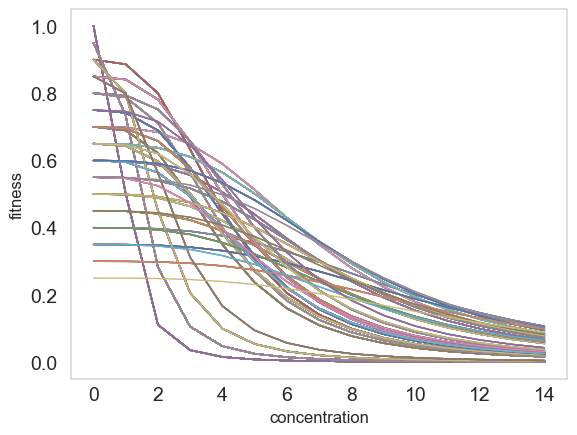

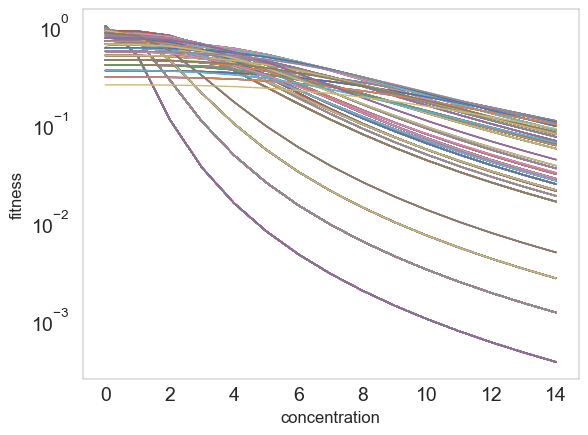

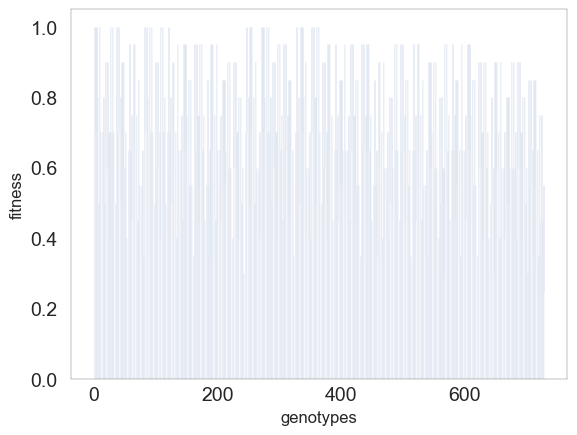

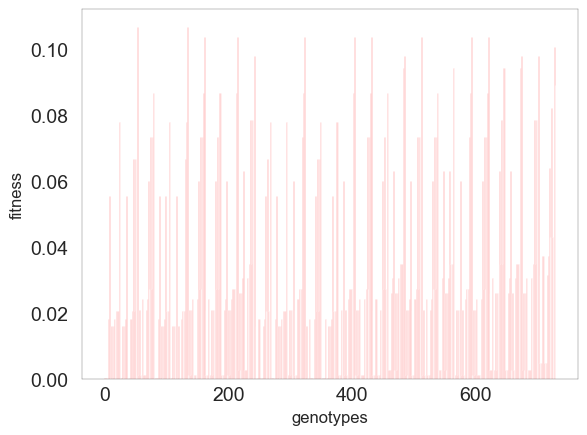

In [2]:
wrm=reload(wrm)
name='Figs'
N=1
loci=6
mutation_rate=0.0001 
initial_male_fraction=0.2
mean_selfing_offspring_num=300
mean_sexrep_offspring_num=1000
sex_asex_reproduction_ratio=0.1


cost_vector=[0.05, 0.05,0.05,0.1,0.2,0.3]
benefit_vector=[0.5,0.5,0.5,3,3,3]
dominance = 0  #0 for recessive, 1 for dominant, in between possible
concentration_gradient=[0.0000,0.1,0.2,0.4,0.8,1,1.5,2,2.5,3,4,5,6,8,10,12,15]


cycle_length=4
cycle_number=len(concentration_gradient)

increase_determinant=30
utility_function=wrm.Utility(loci, dominance, cost_vector,benefit_vector, max(concentration_gradient))
utility_function.plot_PD_curve(name=name)


### Define colors for fitness

In [6]:
[a,b]=np.shape(utility_function.genotypes)
zvec=[]
cvec=[]
for i in range (a):
    z=0
    c=0
    for j in range (b):
        if utility_function.genotypes[i,j]==2:
            z=z+1
        if utility_function.genotypes[i,j]==1:
            c=c+1
    zvec.append(z)
    cvec.append(c)
    
zvec=np.array(zvec)  # number of homozygotic mutated alleles - number of effective mutations.  
cvec=np.array(cvec)  #number of heterozygotic alleles

# Create a colormap based on the color vector
#colormap = plt.cm.get_cmap('jet', 7)
colormap = plt.colormaps['jet'].resampled(7)


In [9]:
values_at_0=utility_function.get_fitness(0)
values_at_2=utility_function.get_fitness(2)
values_at_5=utility_function.get_fitness(5)
values_at_10=utility_function.get_fitness(10)
values_at_15=utility_function.get_fitness(15)
values_at_20=utility_function.get_fitness(20)
values_at_25=utility_function.get_fitness(25)
values_at_30=utility_function.get_fitness(30)
values_at_300=utility_function.get_fitness(300)


ec50 [ 1.   1.   4.   1.   1.   4.   4.   4.   7.   1.   1.   4.   1.   1.
  4.   4.   4.   7.   4.   4.   7.   4.   4.   7.   7.   7.  10.   1.
  1.   4.   1.   1.   4.   4.   4.   7.   1.   1.   4.   1.   1.   4.
  4.   4.   7.   4.   4.   7.   4.   4.   7.   7.   7.  10.   1.5  1.5
  4.5  1.5  1.5  4.5  4.5  4.5  7.5  1.5  1.5  4.5  1.5  1.5  4.5  4.5
  4.5  7.5  4.5  4.5  7.5  4.5  4.5  7.5  7.5  7.5 10.5  1.   1.   4.
  1.   1.   4.   4.   4.   7.   1.   1.   4.   1.   1.   4.   4.   4.
  7.   4.   4.   7.   4.   4.   7.   7.   7.  10.   1.   1.   4.   1.
  1.   4.   4.   4.   7.   1.   1.   4.   1.   1.   4.   4.   4.   7.
  4.   4.   7.   4.   4.   7.   7.   7.  10.   1.5  1.5  4.5  1.5  1.5
  4.5  4.5  4.5  7.5  1.5  1.5  4.5  1.5  1.5  4.5  4.5  4.5  7.5  4.5
  4.5  7.5  4.5  4.5  7.5  7.5  7.5 10.5  1.5  1.5  4.5  1.5  1.5  4.5
  4.5  4.5  7.5  1.5  1.5  4.5  1.5  1.5  4.5  4.5  4.5  7.5  4.5  4.5
  7.5  4.5  4.5  7.5  7.5  7.5 10.5  1.5  1.5  4.5  1.5  1.5  4.5  4.5
  4.5  7

In [59]:
# Get the indices that would sort the vector
sorted_indices = np.argsort(values_at_0)[::-1]

# Use the sorted indices to obtain the sorted vector. All sorted by initial fitness. 
sorted_values_at_0 = values_at_0[sorted_indices]
sorted_values_at_2 = values_at_2[sorted_indices]
sorted_values_at_5 = values_at_5[sorted_indices]
sorted_values_at_10 = values_at_10[sorted_indices]
sorted_values_at_15 = values_at_15[sorted_indices]
sorted_values_at_20 = values_at_20[sorted_indices]
sorted_values_at_25 = values_at_25[sorted_indices]
sorted_values_at_30 = values_at_30[sorted_indices]


sorted_zvec=zvec[sorted_indices]

In [61]:
X=values_at_30
max_value = max(X)  # Find the maximum value in the list
index_of_max = np.argmax(X)

print(f"The index of the biggest element is: {index_of_max}")
print(f"The biggest element is: {X[index_of_max]}")
max_genotype=utility_function.genotypes[index_of_max]
print (max_genotype)


The index of the biggest element is: 80
The biggest element is: 0.014389308402253397
[0. 0. 2. 2. 2. 2.]


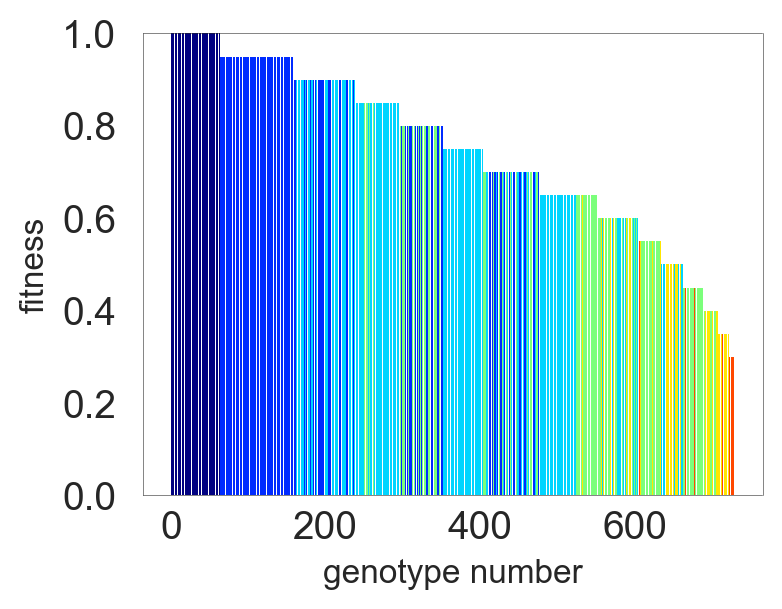

In [87]:
fig, ax = plt.subplots(dpi=200, figsize=(4, 3))
bars = ax.bar(range(len(sorted_values_at_0)), sorted_values_at_0, color=colormap(sorted_zvec), linewidth=0)
plt.xlabel('genotype number')
plt.ylabel('fitness')
plt.ylim([0,1]) # If you want y-limits back

# Add colorbar with values from 0 to 6

norm = plt.Normalize(0, 6)
sm = plt.cm.ScalarMappable(cmap=colormap, norm=norm)
sm.set_array([])  # An empty array is needed for the mappable to work

#cbar = plt.colorbar(sm, ax=ax, ticks=np.arange(7))
#cbar.set_label('Number of homozygous mutated loci')
plt.savefig(name+'FitnessAt0b.png',bbox_inches='tight')

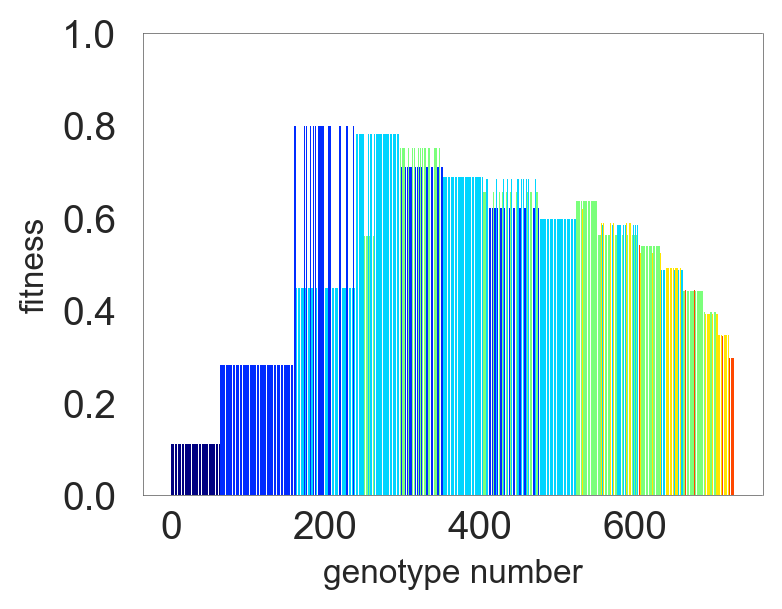

In [89]:
fig, ax = plt.subplots(dpi=200, figsize=(4, 3))
bars = ax.bar(range(len(sorted_values_at_2)), sorted_values_at_2, color=colormap(sorted_zvec), linewidth=0)
plt.xlabel('genotype number')
plt.ylabel('fitness')
plt.ylim([0,1]) # If you want y-limits back

# Add colorbar with values from 0 to 6

norm = plt.Normalize(0, 6)
sm = plt.cm.ScalarMappable(cmap=colormap, norm=norm)
sm.set_array([])  # An empty array is needed for the mappable to work

#cbar = plt.colorbar(sm, ax=ax, ticks=np.arange(7))
#cbar.set_label('Number of homozygous mutated loci')

plt.savefig(name+'FitnessAt2b.png',bbox_inches='tight')

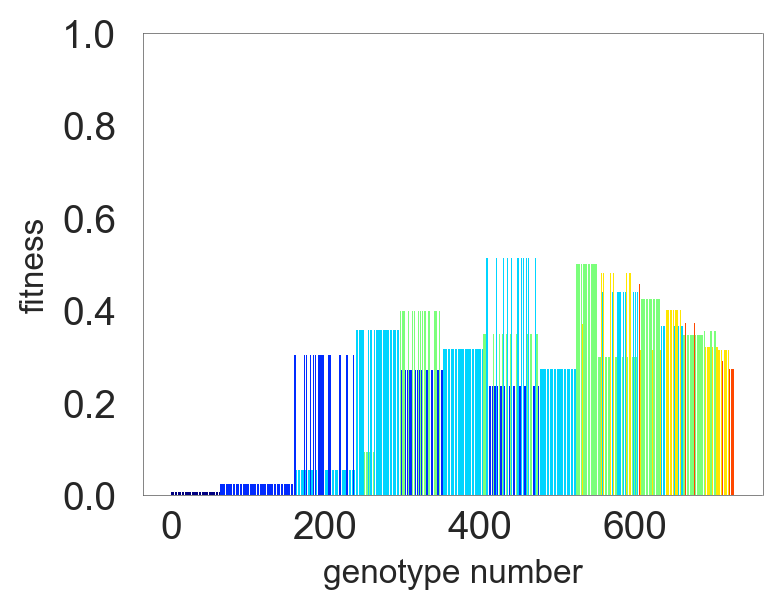

In [93]:
fig, ax = plt.subplots(dpi=200, figsize=(4, 3))
bars = ax.bar(range(len(sorted_values_at_5)), sorted_values_at_5, color=colormap(sorted_zvec), linewidth=0)
plt.xlabel('genotype number')
plt.ylabel('fitness')
plt.ylim([0,1]) # If you want y-limits back

# Add colorbar with values from 0 to 6

norm = plt.Normalize(0, 6)
sm = plt.cm.ScalarMappable(cmap=colormap, norm=norm)
sm.set_array([])  # An empty array is needed for the mappable to work

#cbar = plt.colorbar(sm, ax=ax, ticks=np.arange(7))
#cbar.set_label('Number of homozygous mutated loci')

plt.savefig(name+'FitnessAt5b.png',bbox_inches='tight')

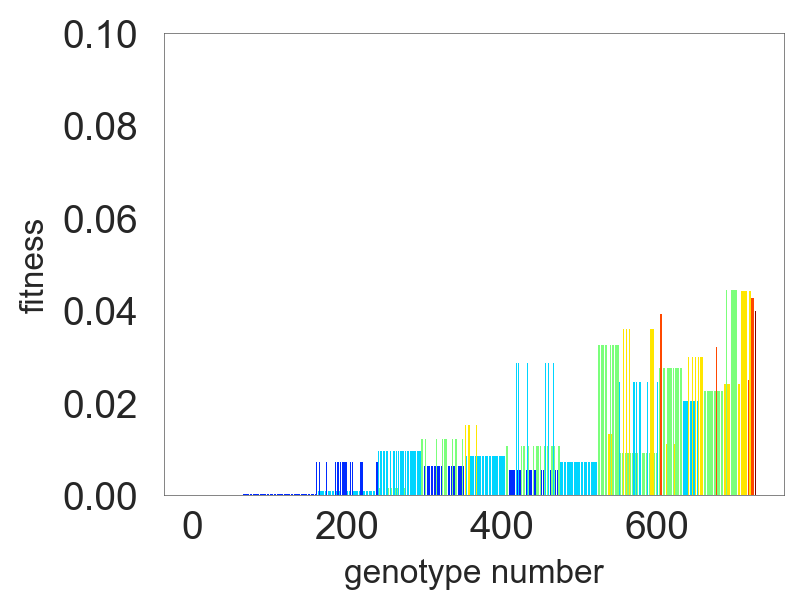

<Figure size 640x480 with 0 Axes>

In [101]:
fig, ax = plt.subplots(dpi=200, figsize=(4, 3))
bars = ax.bar(range(len(sorted_values_at_20)), sorted_values_at_20, color=colormap(sorted_zvec), linewidth=0)
plt.xlabel('genotype number')
plt.ylabel('fitness')
plt.ylim([0,0.1]) # If you want y-limits back

# Add colorbar with values from 0 to 6

norm = plt.Normalize(0, 6)
sm = plt.cm.ScalarMappable(cmap=colormap, norm=norm)
sm.set_array([])  # An empty array is needed for the mappable to work

#cbar = plt.colorbar(sm, ax=ax, ticks=np.arange(7))
#cbar.set_label('Number of homozygous mutated loci')
plt.show()
plt.savefig(name+'FitnessAt20b.png',bbox_inches='tight')

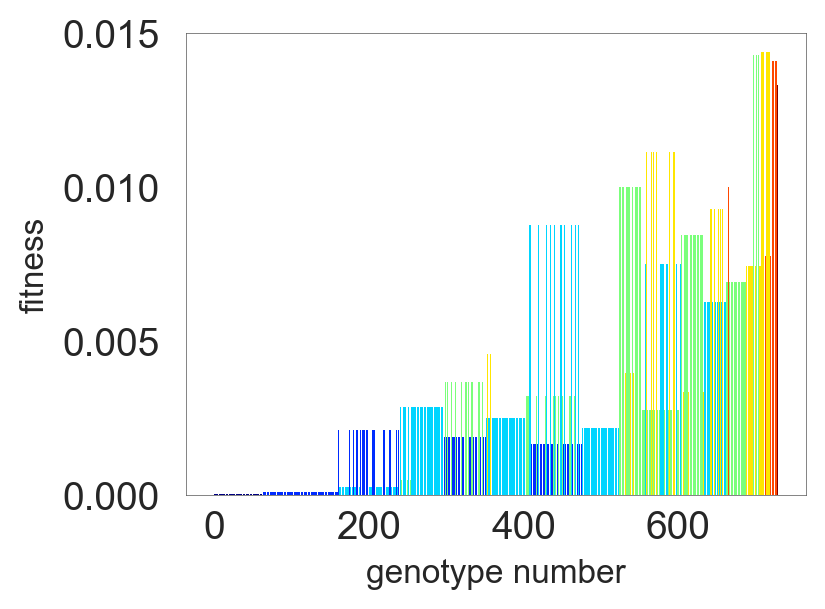

In [105]:
fig, ax = plt.subplots(dpi=200, figsize=(4, 3))
bars = ax.bar(range(len(sorted_values_at_30)), sorted_values_at_30, color=colormap(sorted_zvec), linewidth=0)
plt.xlabel('genotype number')
plt.ylabel('fitness')
plt.ylim([0,0.015]) # If you want y-limits back

# Add colorbar with values from 0 to 6

norm = plt.Normalize(0, 6)
sm = plt.cm.ScalarMappable(cmap=colormap, norm=norm)
sm.set_array([])  # An empty array is needed for the mappable to work

#cbar = plt.colorbar(sm, ax=ax, ticks=np.arange(7))
#cbar.set_label('Number of homozygous mutated loci')

plt.savefig(name+'FitnessAt30.png',bbox_inches='tight')

## Plotting PD curves

In [113]:
def plot_PD_curve( max_c, c, name='FinalFigs'):
        fig, ax = plt.subplots(dpi=200, figsize=(6, 5))
        colormap = plt.colormaps['jet'].resampled(7)

        PD_curves=[]
        c_array=np.linspace(0, int(max_c),int(max_c)+1)
        for i in c_array:
            point=utility_function.get_fitness(i)
            PD_curves.append(point)
        PD_curves=np.array(PD_curves)


        b=729
        ## number of offspring if mating
        for i in range(b):
            plt.plot(c_array, 1000*PD_curves[:,i], label=f'Column {i + 1}', color=colormap(c[i]), alpha=0.1, linewidth=2)
    
        plt.ylabel('fitness')
        plt.xlabel('concentration [nM]')
        plt.xlim([0,20])
        plt.savefig(name+'PD_curves_m.png',bbox_inches='tight')
        plt.show()
        
        ## number of offspring if selfing
        fig, ax = plt.subplots(dpi=200, figsize=(6, 5))
        for i in range(b):
            plt.plot(c_array, 300*PD_curves[:,i], label=f'Column {i + 1}', color=colormap(c[i]), alpha=0.1, linewidth=2)
    
        plt.ylabel('fitness')
        plt.xlabel('concentration [nM]')
        plt.xlim([0,20])
        plt.savefig(name+'PD_curves_s.png',bbox_inches='tight')
        plt.show()
        
        ## fitness
        fig, ax = plt.subplots(dpi=200, figsize=(6, 5))
        for i in range(b):
            plt.plot(c_array, 1*PD_curves[:,i], label=f'Column {i + 1}', color=colormap(c[i]), alpha=1, linewidth=2)
    
        plt.ylabel('fitness', fontsize=16)
        plt.xlabel('concentration [nM]', fontsize=16)
        plt.ylim([0,1])
        plt.xlim([0,max_c])
        plt.savefig(name+'PD_curves_Fitness2.png',bbox_inches='tight')

        plt.show()
        print (name)
        #plt.semilogy(PD_curves)
        #plt.ylabel('fitness')
        #plt.xlabel('concentration')
        #plt.savefig(name+'PD_curves_log.png',bbox_inches='tight')
        #plt.show()